# Yoga-82 Veri Seti Görüntü Sayısı Analizi

Bu notebook, Yoga-82/dataset klasörü içerisindeki her bir alt klasörün içerdiği görüntü dosyalarının sayısını analiz eder ve listeler.

## Gerekli Kütüphanelerin İçe Aktarılması

In [1]:
import torch
print(torch.version.cuda)

12.8


In [19]:
!pip install -r requirements.txt

In [20]:
# Gerekli kütüphanelerin içe aktarılması
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Klasör Yapısının İncelenmesi

Öncelikle Yoga-82/dataset klasör yapısını inceleyerek alt klasörleri ve dosyaları keşfedelim.

In [21]:
# Yoga-82 veri setinin yolu
dataset_path = "/home/enes-gumuskaynak/action_recognition/Yoga-82/dataset"

# Klasörün var olup olmadığını kontrol et
if not os.path.exists(dataset_path):
    print(f"Hata: {dataset_path} yolu bulunamadı!")
else:
    print(f"{dataset_path} klasörü bulundu.")
    
    # Ana klasördeki alt klasörleri listele
    subfolders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    print(f"Toplam alt klasör sayısı: {len(subfolders)}")
    print("İlk 10 alt klasör:")
    for i, folder in enumerate(subfolders[:10]):
        print(f"  {i+1}. {folder}")

/home/enes-gumuskaynak/action_recognition/Yoga-82/dataset klasörü bulundu.
Toplam alt klasör sayısı: 82
İlk 10 alt klasör:
  1. Dolphin_Plank_Pose_or_Makara_Adho_Mukha_Svanasana_
  2. Low_Lunge_pose_or_Anjaneyasana_
  3. Bow_Pose_or_Dhanurasana_
  4. Cobra_Pose_or_Bhujangasana_
  5. Cockerel_Pose
  6. Bound_Angle_Pose_or_Baddha_Konasana_
  7. Supported_Headstand_pose_or_Salamba_Sirsasana_
  8. Upward_Facing_Two-Foot_Staff_Pose_or_Dwi_Pada_Viparita_Dandasana_
  9. Boat_Pose_or_Paripurna_Navasana_
  10. Plow_Pose_or_Halasana_


## Alt Klasörlerdeki Görüntü Sayılarının Hesaplanması

Her bir alt klasör için içerisindeki görüntü dosyalarının sayısını hesaplayalım.
Yaygın görüntü dosya uzantılarını (.jpg, .jpeg, .png) dikkate alacağız.

In [22]:
# Görüntü dosya uzantıları
image_extensions = ['.jpg', '.jpeg', '.png']

# Alt klasörlerdeki görüntü sayılarını saklamak için sözlük
image_counts = {}

# Her bir alt klasördeki görüntüleri say
for yoga_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, yoga_class)
    
    # Sadece klasörleri işle
    if os.path.isdir(class_path):
        # Bu alt klasördeki görüntü dosyalarını say
        count = 0
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            if os.path.isfile(file_path) and any(file.lower().endswith(ext) for ext in image_extensions):
                count += 1
        
        # Sonuçları sözlüğe ekle
        image_counts[yoga_class] = count

print(f"Toplam {len(image_counts)} yoga sınıfı analiz edildi.")

Toplam 82 yoga sınıfı analiz edildi.


## Sonuçların Görselleştirilmesi

Toplanan verileri bir pandas DataFrame'e dönüştürerek görselleştirelim.

In [23]:
# Sonuçları DataFrame'e dönüştür
df = pd.DataFrame(list(image_counts.items()), columns=['Yoga Sınıfı', 'Görüntü Sayısı'])

# Görüntü sayısına göre azalan sırada sırala
df = df.sort_values(by='Görüntü Sayısı', ascending=False)

# Sonuçları göster
print("Yoga sınıflarındaki görüntü sayıları:")
print(df.head(100))  # İlk 10 sınıfı göster

# Toplam görüntü sayısını hesapla
total_images = df['Görüntü Sayısı'].sum()
print(f"\nToplam görüntü sayısı: {total_images}")

# Sınıf başına ortalama görüntü sayısı
avg_images = df['Görüntü Sayısı'].mean()
print(f"Sınıf başına ortalama görüntü sayısı: {avg_images:.2f}")

Yoga sınıflarındaki görüntü sayıları:
                                          Yoga Sınıfı  Görüntü Sayısı
3                         Cobra_Pose_or_Bhujangasana_             750
36                            Sitting pose 1 (normal)             664
44  Extended_Revolved_Triangle_Pose_or_Utthita_Tri...             510
29  Extended_Revolved_Side_Angle_Pose_or_Utthita_P...             502
65                      Cat_Cow_Pose_or_Marjaryasana_             393
..                                                ...             ...
48        Side-Reclining_Leg_Lift_pose_or_Anantasana_              67
27                        Plank_Pose_or_Kumbhakasana_              65
0   Dolphin_Plank_Pose_or_Makara_Adho_Mukha_Svanas...              48
78                         Pigeon_Pose_or_Kapotasana_              47
22                            Noose_Pose_or_Pasasana_              40

[82 rows x 2 columns]

Toplam görüntü sayısı: 18417
Sınıf başına ortalama görüntü sayısı: 224.60


In [24]:
# En çok ve en az görüntüye sahip sınıflar
print("En çok görüntüye sahip sınıf:")
print(df.iloc[0])

print("\nEn az görüntüye sahip sınıf:")
print(df.iloc[-1])

En çok görüntüye sahip sınıf:
Yoga Sınıfı       Cobra_Pose_or_Bhujangasana_
Görüntü Sayısı                            750
Name: 3, dtype: object

En az görüntüye sahip sınıf:
Yoga Sınıfı       Noose_Pose_or_Pasasana_
Görüntü Sayısı                         40
Name: 22, dtype: object


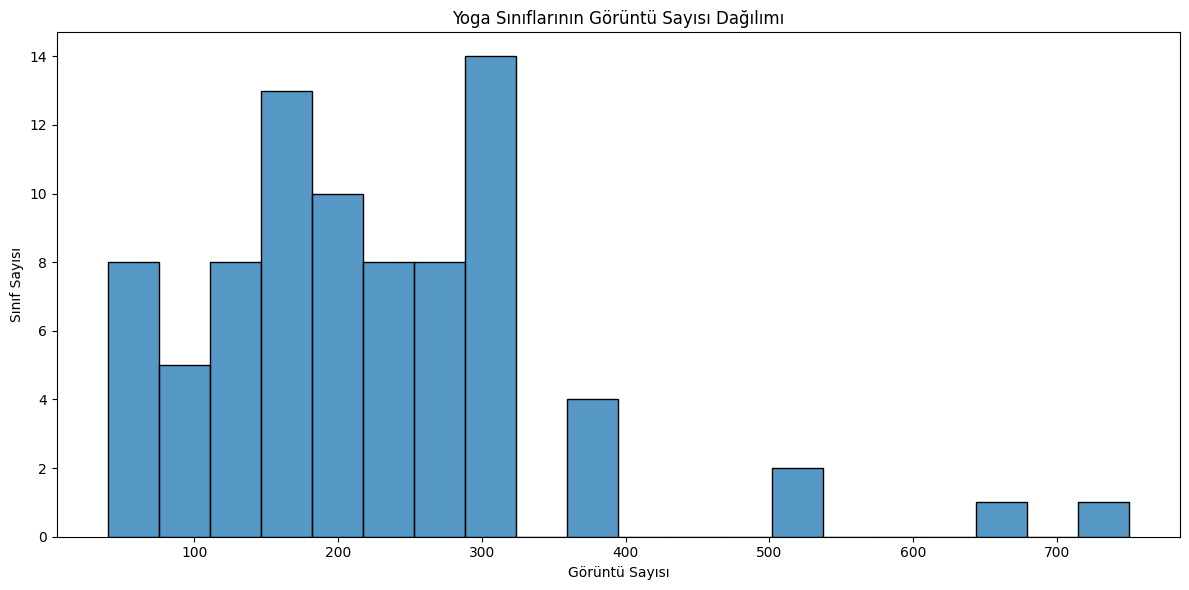

In [25]:
# Görüntü sayılarının dağılımını görselleştir
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['Görüntü Sayısı'], bins=20)
ax.set_title('Yoga Sınıflarının Görüntü Sayısı Dağılımı')
ax.set_xlabel('Görüntü Sayısı')
ax.set_ylabel('Sınıf Sayısı')
plt.tight_layout()
plt.show()

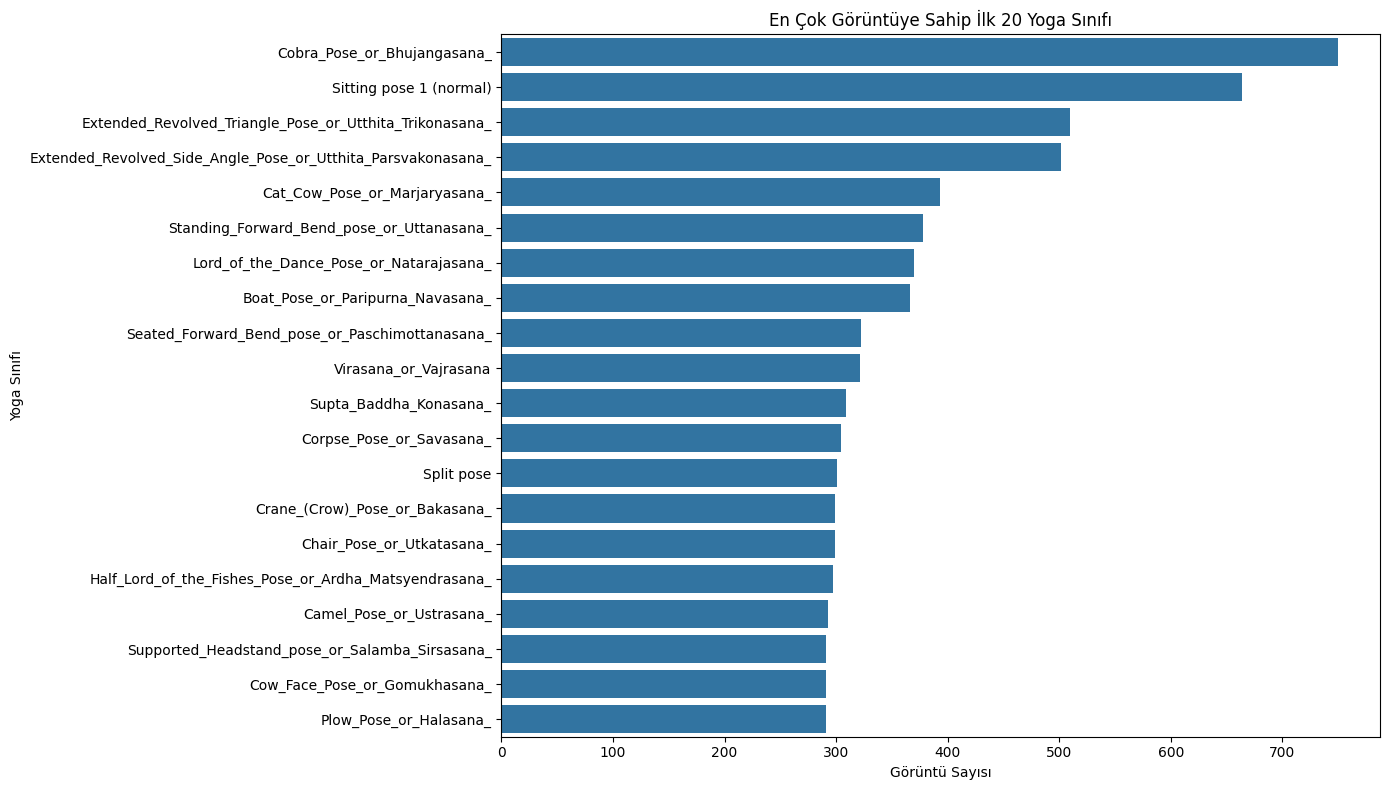

In [26]:
# En çok görüntüye sahip ilk 20 sınıfı görselleştir
plt.figure(figsize=(14, 8))
top_20 = df.head(20)
ax = sns.barplot(x='Görüntü Sayısı', y='Yoga Sınıfı', data=top_20)
ax.set_title('En Çok Görüntüye Sahip İlk 20 Yoga Sınıfı')
ax.set_xlabel('Görüntü Sayısı')
ax.set_ylabel('Yoga Sınıfı')
plt.tight_layout()
plt.show()

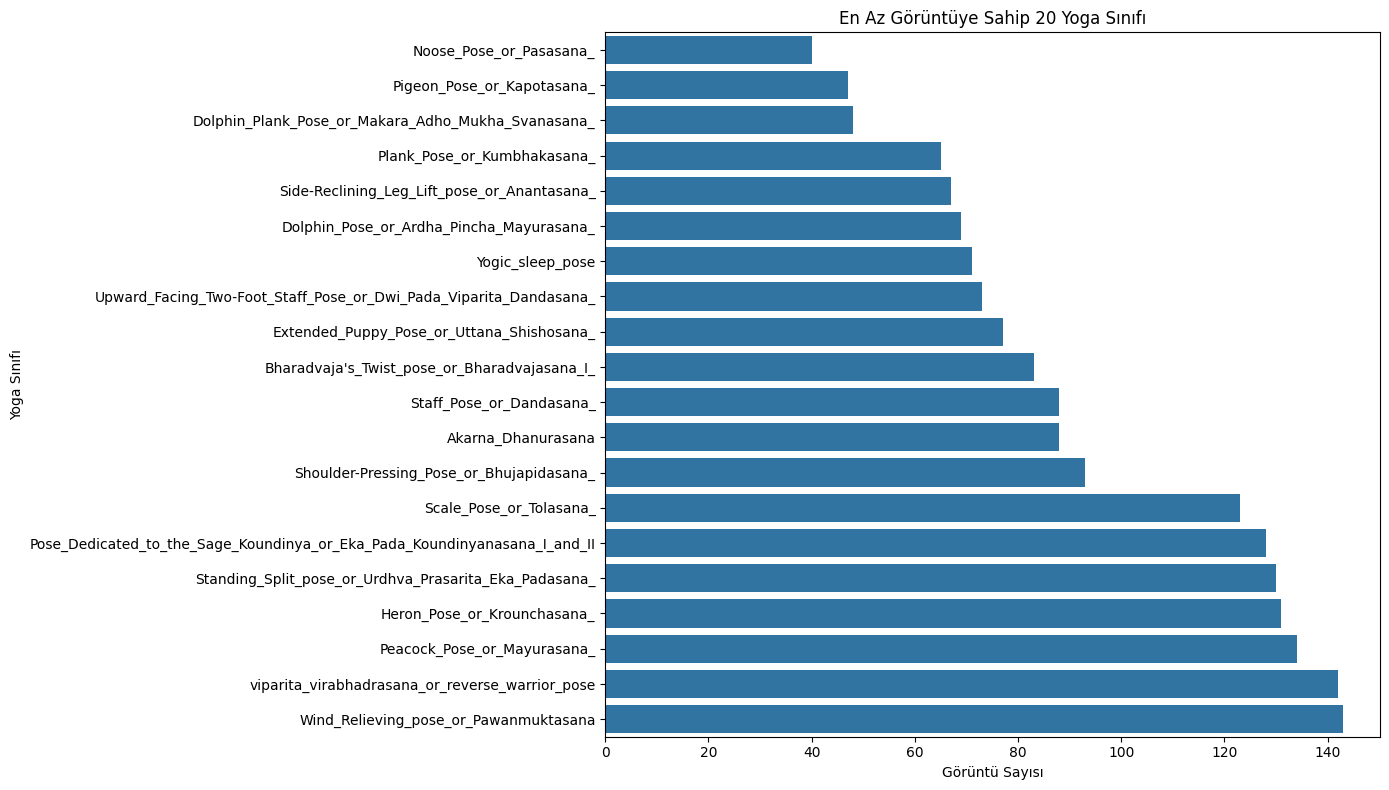

In [27]:
# En az görüntüye sahip 20 sınıfı görselleştir
plt.figure(figsize=(14, 8))
bottom_20 = df.tail(20)  # En az görüntüye sahip 20 sınıf
# Görüntü sayısına göre artan sırada sırala (en az olanlar en üstte)
bottom_20 = bottom_20.sort_values(by='Görüntü Sayısı', ascending=True)
ax = sns.barplot(x='Görüntü Sayısı', y='Yoga Sınıfı', data=bottom_20)
ax.set_title('En Az Görüntüye Sahip 20 Yoga Sınıfı')
ax.set_xlabel('Görüntü Sayısı')
ax.set_ylabel('Yoga Sınıfı')
plt.tight_layout()
plt.show()

## Özet

Bu analizde:

1. Yoga-82 veri setindeki her bir yoga sınıfı için görüntü sayılarını hesapladık
2. Sınıflar arasındaki dağılımı inceledik
3. En çok ve en az görüntüye sahip sınıfları belirledik
4. Görüntü sayılarının genel dağılımını görselleştirdik

Bu bilgiler, veri setinin dengeli olup olmadığını anlamak ve modelleme aşamasında sınıf dengesizliğini ele almak için kullanılabilir.

In [2]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128

Looking in indexes: https://download.pytorch.org/whl/cu128
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 8.1 MB/s eta 0:00:0000:0100:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.6/609.6 MB 9.2 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 7.4 MB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.9/726.9 MB 8.9 MB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 8.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 9.3 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.4/260.4 MB 9.0 MB/s eta 0:00:0000

In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)

2.7.0+cu128
12.8


In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
x = torch.randn(1, device='cuda')
print(x)

True
NVIDIA GeForce RTX 5090
tensor([0.6391], device='cuda:0')
